<a href="https://colab.research.google.com/github/SoYeoni621/mulcam/blob/master/0308_Tue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Model

import tensorflow_datasets as tfds
tf.random.set_seed(42)

In [ ]:
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteL9DQBI/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteL9DQBI/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteL9DQBI/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [ ]:
sample_str = 'Tensorflow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_str)
tokenized_string

[6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]

In [ ]:
for token in tokenized_string:
    print("{} -> {}".format(token, tokenizer.decode([token])))

6307 -> Ten
2327 -> sor
2934 -> flow
2 -> , 
48 -> from 
4249 -> basi
4429 -> cs 
7 -> to 
2652 -> master
8050 -> y


In [ ]:
original_string = tokenizer.decode(tokenized_string)
original_string

'Tensorflow, from basics to mastery'

In [ ]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

embedding_dim=16
max_length=120

model = Sequential()
model.add(Embedding(tokenizer.vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           130960    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 131,069
Trainable params: 131,069
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tokenizer.vocab_size

8185

In [ ]:
num_epochs = 10

hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 12s 19ms/step - loss: 0.6894 - accuracy: 0.5662 - val_loss: 0.6763 - val_accuracy: 0.6528
Epoch 2/10
391/391 [==============================] - 8s 19ms/step - loss: 0.6183 - accuracy: 0.7478 - val_loss: 0.5566 - val_accuracy: 0.7790
Epoch 3/10
391/391 [==============================] - 8s 19ms/step - loss: 0.4810 - accuracy: 0.8298 - val_loss: 0.4471 - val_accuracy: 0.8376
Epoch 4/10
391/391 [==============================] - 8s 19ms/step - loss: 0.3842 - accuracy: 0.8710 - val_loss: 0.3862 - val_accuracy: 0.8586
Epoch 5/10
391/391 [==============================] - 9s 19ms/step - loss: 0.3262 - accuracy: 0.8870 - val_loss: 0.3532 - val_accuracy: 0.8657
Epoch 6/10
391/391 [==============================] - 8s 19ms/step - loss: 0.2911 - accuracy: 0.8974 - val_loss: 0.3329 - val_accuracy: 0.8700
Epoch 7/10
391/391 [==============================] - 8s 19ms/step - loss: 0.2655 - accuracy: 0.9061 - val_loss: 0.3220 - val_accuracy: 0.872

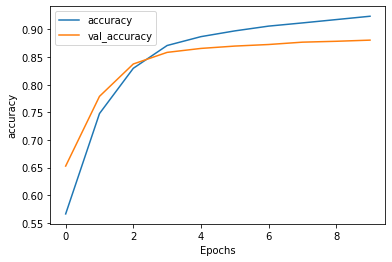

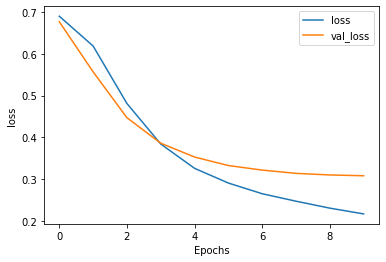

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(hist, string):
    plt.plot(hist.history[string])
    plt.plot(hist.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(hist, 'accuracy')
plot_graphs(hist, 'loss')

# LSTM

In [ ]:
from tensorflow.keras.layers import SimpleRNN, RNN

cell = layers.SimpleRNNCell(units=5, input_shape=(max_length, embedding_dim))
model = Sequential([Embedding(tokenizer.vocab_size, embedding_dim),
                    SimpleRNN(64),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 926s 2s/step - loss: 0.6960 - accuracy: 0.5032 - val_loss: 0.6982 - val_accuracy: 0.4969
Epoch 2/10
391/391 [==============================] - 859s 2s/step - loss: 0.6963 - accuracy: 0.4948 - val_loss: 0.6953 - val_accuracy: 0.4956
Epoch 3/10
391/391 [==============================] - 856s 2s/step - loss: 0.6971 - accuracy: 0.4968 - val_loss: 0.6956 - val_accuracy: 0.5014
Epoch 4/10
391/391 [==============================] - 870s 2s/step - loss: 0.6955 - accuracy: 0.5010 - val_loss: 0.6959 - val_accuracy: 0.5000
Epoch 5/10
391/391 [==============================] - 869s 2s/step - loss: 0.6955 - accuracy: 0.5001 - val_loss: 0.6973 - val_accuracy: 0.4978
Epoch 6/10
391/391 [==============================] - 866s 2s/step - loss: 0.6949 - accuracy: 0.4961 - val_loss: 0.6955 - val_accuracy: 0.4968
Epoch 7/10
391/391 [==============================] - 858s 2s/step - loss: 0.6949 - accuracy: 0.5036 - val_loss: 0.6935 - val_accuracy: 0.5000

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential([Embedding(tokenizer.vocab_size, embedding_dim),
                    LSTM(units=64),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 86s 208ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
391/391 [==============================] - 83s 210ms/step - loss: 0.6926 - accuracy: 0.5037 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/10
391/391 [==============================] - 82s 208ms/step - loss: 0.7097 - accuracy: 0.4949 - val_loss: 0.6928 - val_accuracy: 0.5022
Epoch 4/10
391/391 [==============================] - 82s 208ms/step - loss: 0.6907 - accuracy: 0.5064 - val_loss: 0.6936 - val_accuracy: 0.5018
Epoch 5/10
391/391 [==============================] - 82s 208ms/step - loss: 0.6892 - accuracy: 0.5050 - val_loss: 0.6943 - val_accuracy: 0.4999
Epoch 6/10
391/391 [==============================] - 82s 208ms/step - loss: 0.6875 - accuracy: 0.5031 - val_loss: 0.6941 - val_accuracy: 0.5023
Epoch 7/10
391/391 [==============================] - 82s 207ms/step - loss: 0.6868 - accuracy: 0.5090 - val_loss: 0.6962 - val_ac

# GRU

In [ ]:
from tensorflow.keras.layers import GRU

model = Sequential([Embedding(tokenizer.vocab_size, embedding_dim),
                    GRU(64),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Bidirectional

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([Embedding(tokenizer.vocab_size, embedding_dim),
                    Bidirectional(LSTM(units=64)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

# Stacking

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([Embedding(tokenizer.vocab_size, embedding_dim),
                    Bidirectional(LSTM(units=64, return_sequences=True)),
                    Bidirectional(LSTM(64))
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()